In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [8]:
def load_sparse(f):
    df = pd.read_csv(f)
    steps = np.array(df['Step'])
    sparsity = np.array(df['Value'])
    return steps, sparsity

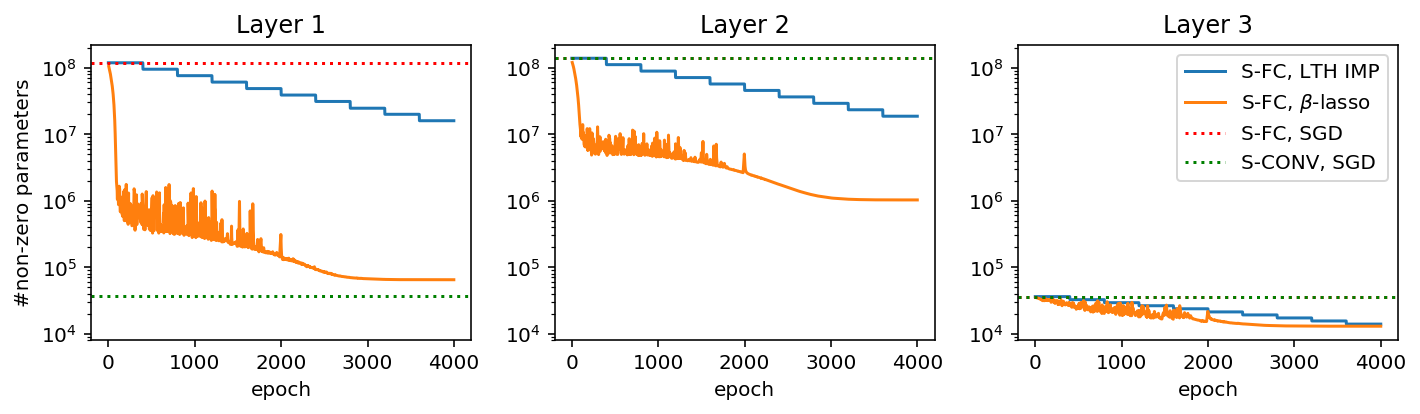

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10, 3))

axes = [ax1, ax2, ax3]

lth_1 = [1.18e+8, 9.441e+7, 7.55e+7, 6.0436e+7, 4.83e+7, 3.86e+7, 3.092e+7, 2.447e+7, 1.983e+7, 1.587e+7]
lth_1 = np.repeat(lth_1, 400)
ax1.plot(lth_1, label='S-FC, LTH IMP')
ax1.plot(*load_sparse('first_layer.csv'), label='S-FC, $\\beta$-lasso')
ax1.axhline(118003200, linestyle=':', color='red', label='S-FC')
ax1.axhline(36600, linestyle=':', color='green', label='S-CONV')
ax1.set_yscale('log')
lth_2 = [1.38e+8, 1.106e+8, 8.8477e+7, 7.07e+7, 5.66e+7, 4.53e+7, 3.62e+7, 2.899e+7, 2.319e+7, 1.8558e+7]
lth_2 = np.repeat(lth_2, 400)
ax2.plot(lth_2, label='S-FC, LTH IMP')
ax2.plot(*load_sparse('second_layer.csv'), label='S-FC, $\\beta$-lasso')
ax2.axhline(138243600, linestyle=':', color='red', label='S-FC')
ax2.axhline(138243600, linestyle=':', color='green', label='S-CONV')
ax2.set_yscale('log')
lth_3 = [3.601e+4, 3.241e+4, 2.917e+4, 2.625e+4, 2.3629e+4, 2.12e+4, 1.91e+4, 1.72e+4, 1.55e+4, 1.39e+4]
lth_3 = np.repeat(lth_3, 400)
ax3.plot(lth_3, label='S-FC, LTH IMP')
ax3.plot(*load_sparse('last_layer.csv'), label='S-FC, $\\beta$-lasso')
ax3.axhline(36010, linestyle=':', color='red', label='S-FC, SGD')
ax3.axhline(36010, linestyle=':', color='green', label='S-CONV, SGD')
ax3.set_yscale('log')

ax1.set_ylabel('#non-zero parameters')
ax1.set_title('Layer 1')
ax1.set_xlabel('epoch')
ax2.set_title('Layer 2')
ax2.set_xlabel('epoch')
ax3.set_title('Layer 3')
ax3.set_xlabel('epoch')

ax3.legend()

for ax in axes:
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)

fig.tight_layout()

plt.savefig('nnz.pdf')
plt.show()